# Pré-processamento dos dados de instrumentação de módulos de programas utilizados em espaçonaves da NASA

Arquivo JM1 de "_PROMISE Software Engineering Repository_"

## Importar bibliotecas Python que serão utilizadas

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.combine import SMOTETomek
smk = SMOTETomek()

## Ler o arquivo JM1 e apresentar amostra do conteúdo

In [2]:
df = pd.read_csv('../_data/jm1.csv', sep=',', index_col=None)

display(df.head(n=10))
df.shape

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,errorRate,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,1.2,1.2,1.2,1.2,1.4,0,0
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1.0,1.0,1.0,1.0,1.0,1,1
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,...,10,8,1,17.0,36.0,112.0,86.0,13.0,1,1
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,...,29,28,2,17.0,135.0,329.0,271.0,5.0,1,1
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,...,1,6,0,11.0,16.0,76.0,50.0,7.0,1,1
5,31.0,2.0,1.0,2.0,111.0,582.52,0.08,12.25,47.55,7135.87,...,0,5,0,14.0,24.0,69.0,42.0,3.0,1,1
6,78.0,9.0,5.0,4.0,0.0,0.00,0.00,0.00,0.00,0.00,...,0,0,0,0.0,0.0,0.0,0.0,17.0,1,1
7,8.0,1.0,1.0,1.0,16.0,50.72,0.36,2.80,18.11,142.01,...,0,1,0,4.0,5.0,9.0,7.0,1.0,1,1
8,24.0,2.0,1.0,2.0,0.0,0.00,0.00,0.00,0.00,0.00,...,0,0,0,0.0,0.0,0.0,0.0,3.0,1,1
9,143.0,22.0,20.0,10.0,0.0,0.00,0.00,0.00,0.00,0.00,...,0,0,0,0.0,0.0,0.0,0.0,43.0,1,1


(10885, 23)

## Remover todas as colunos exceto os indicadores de Halstead:

In [3]:
df.drop(df.columns.difference(['n', 'v', 'l', 'd', 'i', 'e', 't', 'lOCode', 'lOComment', 'lOBlank', 'uniq_Op', 'uniq_Opnd', 'total_Op', 'total_Opnd', 'defects']), 1, inplace=True)

display(df.head(n=10))
df.shape

,n,v,l,d,i,e,t,lOCode,lOComment,lOBlank,uniq_Op,uniq_Opnd,total_Op,total_Opnd,defects
0,1.3,1.30,1.30,1.30,1.30,1.30,1.30,2,2,2,1.2,1.2,1.2,1.2,0
1,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1,1,1,1.0,1.0,1.0,1.0,1
2,198.0,1134.13,0.05,20.31,55.85,23029.10,1279.39,51,10,8,17.0,36.0,112.0,86.0,1
3,600.0,4348.76,0.06,17.06,254.87,74202.67,4122.37,129,29,28,17.0,135.0,329.0,271.0,1
4,126.0,599.12,0.06,17.19,34.86,10297.30,572.07,28,1,6,11.0,16.0,76.0,50.0,1
5,111.0,582.52,0.08,12.25,47.55,7135.87,396.44,19,0,5,14.0,24.0,69.0,42.0,1
6,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0.0,0.0,0.0,0.0,1
7,16.0,50.72,0.36,2.80,18.11,142.01,7.89,5,0,1,4.0,5.0,9.0,7.0,1
8,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0.0,0.0,0.0,0.0,1
9,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0.0,0.0,0.0,0.0,1


(10885, 15)

## Tratar linhas com valores inválidos

In [4]:
df.drop(df.index[0], inplace = True)

idxRowNan = pd.isnull(df).any(1).to_numpy().nonzero()

display(df.iloc[idxRowNan])

df.drop(df.index[idxRowNan], inplace = True)

df.shape

,n,v,l,d,i,e,t,lOCode,lOComment,lOBlank,uniq_Op,uniq_Opnd,total_Op,total_Opnd,defects
143,185.0,1097.19,0.05,18.84,58.25,20667.93,1148.22,38,0,9,NaN,NaN,NaN,NaN,1
358,79.0,417.55,0.07,13.52,30.88,5646.37,313.69,19,0,6,NaN,NaN,NaN,NaN,1
1598,275.0,1650.00,0.03,34.50,47.83,56925.00,3162.50,62,0,12,NaN,NaN,NaN,NaN,1
4214,15.0,51.89,0.34,2.92,17.79,151.35,8.41,3,0,1,NaN,NaN,NaN,NaN,0
8279,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,NaN,NaN,NaN,NaN,0


(10879, 15)

## Remover dados inválidos

In [5]:
cols = df.columns
df[cols] = df[cols].apply(pd.to_numeric, errors='ignore')

display(df[cols].head(n=10))
display(df.describe())
df[cols].shape

,n,v,l,d,i,e,t,lOCode,lOComment,lOBlank,uniq_Op,uniq_Opnd,total_Op,total_Opnd,defects
1,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1,1,1,1.0,1.0,1.0,1.0,1
2,198.0,1134.13,0.05,20.31,55.85,23029.10,1279.39,51,10,8,17.0,36.0,112.0,86.0,1
3,600.0,4348.76,0.06,17.06,254.87,74202.67,4122.37,129,29,28,17.0,135.0,329.0,271.0,1
4,126.0,599.12,0.06,17.19,34.86,10297.30,572.07,28,1,6,11.0,16.0,76.0,50.0,1
5,111.0,582.52,0.08,12.25,47.55,7135.87,396.44,19,0,5,14.0,24.0,69.0,42.0,1
6,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0.0,0.0,0.0,0.0,1
7,16.0,50.72,0.36,2.80,18.11,142.01,7.89,5,0,1,4.0,5.0,9.0,7.0,1
8,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0.0,0.0,0.0,0.0,1
9,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0.0,0.0,0.0,0.0,1
10,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0.0,0.0,0.0,0.0,1


,n,v,l,d,i,e,t,lOCode,lOComment,lOBlank,uniq_Op,uniq_Opnd,total_Op,total_Opnd,defects
count,10879.000000,10879.000000,10879.000000,10879.000000,10879.000000,1.087900e+04,1.087900e+04,10879.000000,10879.000000,10879.000000,10879.000000,10879.000000,10879.000000,10879.000000,10879.000000
mean,114.401783,673.833817,0.135245,14.178523,29.441437,3.684902e+04,2.047168e+03,26.255354,2.738855,4.625333,11.178509,16.753286,68.116739,46.393143,0.193308
std,249.558405,1939.331795,0.160170,18.712778,34.423845,4.344870e+05,2.413817e+04,59.625106,9.010898,9.970341,10.045261,26.668692,151.519442,100.355522,0.394911
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,48.430000,0.030000,3.000000,11.860000,1.619400e+02,9.000000e+00,4.000000,0.000000,0.000000,5.000000,4.000000,8.000000,6.000000,0.000000
50%,49.000000,217.130000,0.080000,9.090000,21.930000,2.031020e+03,1.128300e+02,13.000000,0.000000,2.000000,11.000000,11.000000,29.000000,19.000000,0.000000
75%,119.000000,621.060000,0.160000,18.905000,36.780000,1.141624e+04,6.342400e+02,28.000000,2.000000,5.000000,16.000000,21.000000,71.000000,48.000000,0.000000
max,8441.000000,80843.080000,1.000000,418.200000,569.780000,3.107978e+07,1.726655e+06,2824.000000,344.000000,447.000000,411.000000,1026.000000,5420.000000,3021.000000,1.000000


(10879, 15)

## Normalização dos dados

In [6]:
def normalizar(data):
    """
    Normaliza os atributos em ''data''
    
    Esta função retorna uma versao normalizada de ''data'' onde o valor da
    média de cada atributo é igual a 0 e desvio padrao é igual a 1. Trata-se de
    um importante passo de pré-processamento quando trabalha-se com 
    métodos de aprendizado de máquina.
    """
    
    m, n = data.shape # m = qtde de objetos e n = qtde de atributos por objeto
    
    # Incializa as variaves de saída
    data_norm = np.random.rand(m,n) #inicializa data_norm com valores aleatórios
    mu = 0 # inicializa a média
    sigma = 1 # inicializa o desvio padrão
     
    mu = np.mean(data, axis=0)
    sigma = np.std(data, axis=0, ddof=1)
    
    for i in range(m):
        data_norm[i,:] = (data[i,:]-mu) / sigma
        
    
    return data_norm, mu, sigma

df_temp = df.iloc[:,0:-1].values

df_normal, mu, sigma = normalizar(df_temp)

print('\nPrimeira amostra da base antes da normalização: [%2.4f %2.4f].' %(df_temp[0,0],df_temp[0,1]))
print('\nPrimeira amostra da base apos normalização: [%2.4f %2.4f].' %(df_normal[0,0],df_normal[0,1]))



Primeira amostra da base antes da normalização: [1.0000 1.0000].

Primeira amostra da base apos normalização: [-0.4544 -0.3469].


### Mover os dados normalizados para a tabela original

In [7]:
df.iloc[:,0:-1] = df_normal

display(df.describe().round(8))
df.shape

,n,v,l,d,i,e,t,lOCode,lOComment,lOBlank,uniq_Op,uniq_Opnd,total_Op,total_Opnd,defects
count,10879.000000,10879.000000,10879.000000,10879.000000,10879.000000,10879.000000,10879.000000,10879.000000,10879.000000,10879.000000,10879.000000,10879.000000,10879.000000,10879.000000,10879.000000
mean,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.193308
std,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.394911
min,-0.458417,-0.347457,-0.844383,-0.757692,-0.855263,-0.084810,-0.084810,-0.440341,-0.303949,-0.463909,-1.112814,-0.628201,-0.449558,-0.462288,0.000000
25%,-0.402318,-0.322484,-0.657082,-0.597374,-0.510734,-0.084438,-0.084438,-0.373255,-0.303949,-0.463909,-0.615067,-0.478212,-0.396759,-0.402500,0.000000
50%,-0.262070,-0.235495,-0.344914,-0.271928,-0.218204,-0.080136,-0.080136,-0.222312,-0.303949,-0.263314,-0.017770,-0.215732,-0.258163,-0.272961,0.000000
75%,0.018425,-0.027212,0.154555,0.252580,0.213183,-0.058535,-0.058535,0.029260,-0.081996,0.037578,0.479977,0.159240,0.019029,0.016012,0.000000
max,33.365329,41.338592,5.398976,21.590674,15.696636,71.447328,71.447328,46.922259,37.872048,44.369063,39.802000,37.843877,35.321429,29.640689,1.000000


(10879, 15)

## Discretizar 'defects':

In [8]:
df['defects_binned'] = pd.cut(x = df['defects'], bins=[-1, 0, .2, .4, 1], labels=[0, 1, 2, 3])

### Remover as colunas que já foram discretizadas

In [9]:
df = df.drop(['defects'], axis = 1)

display(df.head(n=10))
df.shape

,n,v,l,d,i,e,t,lOCode,lOComment,lOBlank,uniq_Op,uniq_Opnd,total_Op,total_Opnd,defects_binned
1,-0.454410,-0.346941,5.398976,-0.704253,-0.826213,-0.084808,-0.084769,-0.423569,-0.192972,-0.363612,-1.013265,-0.590703,-0.442958,-0.452323,3
2,0.334985,0.237348,-0.532215,0.327663,0.767159,-0.031807,-0.031808,0.415004,0.805818,0.338471,0.579526,0.721697,0.289621,0.394665,3
3,1.945830,1.894945,-0.469781,0.153984,6.548617,0.085972,0.085972,1.723178,2.914376,2.344420,0.579526,4.433915,1.721781,2.238112,3
4,0.046475,-0.038526,-0.469781,0.160932,0.157407,-0.061110,-0.061111,0.029260,-0.192972,0.137876,-0.017770,-0.028246,0.052028,0.035941,3
5,-0.013631,-0.047085,-0.344914,-0.103059,0.526047,-0.068387,-0.068387,-0.121683,-0.303949,0.037578,0.280878,0.271731,0.005829,-0.043776,3
6,-0.458417,-0.347457,-0.844383,-0.757692,-0.855263,-0.084810,-0.084810,-0.440341,-0.303949,-0.463909,-1.112814,-0.628201,-0.449558,-0.462288,3
7,-0.394304,-0.321303,1.403226,-0.608062,-0.329174,-0.084484,-0.084484,-0.356483,-0.303949,-0.363612,-0.714616,-0.440715,-0.390159,-0.392536,3
8,-0.458417,-0.347457,-0.844383,-0.757692,-0.855263,-0.084810,-0.084810,-0.440341,-0.303949,-0.463909,-1.112814,-0.628201,-0.449558,-0.462288,3
9,-0.458417,-0.347457,-0.844383,-0.757692,-0.855263,-0.084810,-0.084810,-0.440341,-0.303949,-0.463909,-1.112814,-0.628201,-0.449558,-0.462288,3
10,-0.458417,-0.347457,-0.844383,-0.757692,-0.855263,-0.084810,-0.084810,-0.440341,-0.303949,-0.463909,-1.112814,-0.628201,-0.449558,-0.462288,3


(10879, 15)

## Análise de distribuição, covariancia e correlação:

### Distribuição:

#### Defeitos

0    8776
3    2103
2       0
1       0
Name: defects_binned, dtype: int64

<AxesSubplot:xlabel='defects_binned', ylabel='count'>

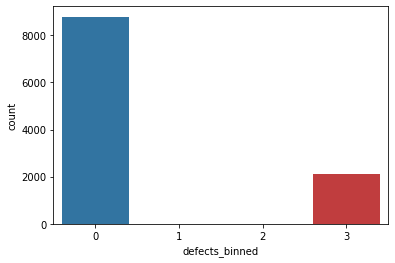

In [10]:
display(df['defects_binned'].value_counts())
sns.countplot(x = 'defects_binned', data=df)

### Matriz de covariância:

,n,v,l,d,i,e,t,lOCode,lOComment,lOBlank,uniq_Op,uniq_Opnd,total_Op,total_Opnd
n,1.000000,0.984277,-0.241020,0.808098,0.651181,0.716559,0.716559,0.944379,0.596411,0.798547,0.610404,0.836167,0.995689,0.989483
v,0.984277,1.000000,-0.198342,0.752201,0.598726,0.800015,0.800015,0.962077,0.576869,0.792322,0.606992,0.852295,0.981566,0.971961
l,-0.241020,-0.198342,1.000000,-0.347604,-0.166655,-0.062128,-0.062128,-0.218620,-0.166293,-0.224004,-0.305422,-0.235076,-0.237608,-0.241309
d,0.808098,0.752201,-0.347604,1.000000,0.398054,0.574348,0.574348,0.768172,0.502187,0.637171,0.749292,0.639673,0.817543,0.777727
i,0.651181,0.598726,-0.166655,0.398054,1.000000,0.209278,0.209278,0.563888,0.392604,0.572311,0.391601,0.726686,0.620667,0.687884
e,0.716559,0.800015,-0.062128,0.574348,0.209278,1.000000,1.000000,0.809094,0.384808,0.600673,0.482075,0.586810,0.735805,0.673493
t,0.716559,0.800015,-0.062128,0.574348,0.209278,1.000000,1.000000,0.809094,0.384808,0.600673,0.482075,0.586810,0.735805,0.673493
lOCode,0.944379,0.962077,-0.218620,0.768172,0.563888,0.809094,0.809094,1.000000,0.553149,0.807308,0.657076,0.847887,0.942672,0.931076
lOComment,0.596411,0.576869,-0.166293,0.502187,0.392604,0.384808,0.384808,0.553149,1.000000,0.620207,0.356593,0.482960,0.596559,0.584531
lOBlank,0.798547,0.792322,-0.224004,0.637171,0.572311,0.600673,0.600673,0.807308,0.620207,1.000000,0.480276,0.687680,0.796699,0.789014


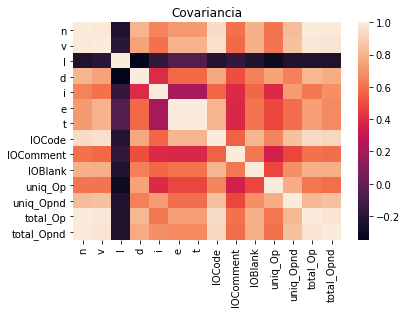

In [11]:
df_cov = df.cov()
display(df_cov)

sns.heatmap(df_cov, xticklabels = df_cov.columns, yticklabels = df_cov.columns)

plt.title('Covariancia')
plt.show()

### Matriz de correlação:

,n,v,l,d,i,e,t,lOCode,lOComment,lOBlank,uniq_Op,uniq_Opnd,total_Op,total_Opnd
n,1.000000,0.984277,-0.241020,0.808098,0.651181,0.716559,0.716559,0.944379,0.596411,0.798547,0.610404,0.836167,0.995689,0.989483
v,0.984277,1.000000,-0.198342,0.752201,0.598726,0.800015,0.800015,0.962077,0.576869,0.792322,0.606992,0.852295,0.981566,0.971961
l,-0.241020,-0.198342,1.000000,-0.347604,-0.166655,-0.062128,-0.062128,-0.218620,-0.166293,-0.224004,-0.305422,-0.235076,-0.237608,-0.241309
d,0.808098,0.752201,-0.347604,1.000000,0.398054,0.574348,0.574348,0.768172,0.502187,0.637171,0.749292,0.639673,0.817543,0.777727
i,0.651181,0.598726,-0.166655,0.398054,1.000000,0.209278,0.209278,0.563888,0.392604,0.572311,0.391601,0.726686,0.620667,0.687884
e,0.716559,0.800015,-0.062128,0.574348,0.209278,1.000000,1.000000,0.809094,0.384808,0.600673,0.482075,0.586810,0.735805,0.673493
t,0.716559,0.800015,-0.062128,0.574348,0.209278,1.000000,1.000000,0.809094,0.384808,0.600673,0.482075,0.586810,0.735805,0.673493
lOCode,0.944379,0.962077,-0.218620,0.768172,0.563888,0.809094,0.809094,1.000000,0.553149,0.807308,0.657076,0.847887,0.942672,0.931076
lOComment,0.596411,0.576869,-0.166293,0.502187,0.392604,0.384808,0.384808,0.553149,1.000000,0.620207,0.356593,0.482960,0.596559,0.584531
lOBlank,0.798547,0.792322,-0.224004,0.637171,0.572311,0.600673,0.600673,0.807308,0.620207,1.000000,0.480276,0.687680,0.796699,0.789014


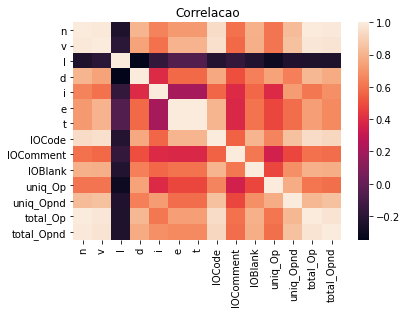

In [12]:
df_corr = df.corr()
display(df_corr)

sns.heatmap(df_corr, xticklabels = df_corr.columns, yticklabels = df_corr.columns)

plt.title('Correlacao')
plt.show()

## Balanceamento dos Dados por Oversampling

In [13]:
df_independ = df.drop(['defects_binned'], 1)

df_depend_defects = df.drop(df.columns.difference(['defects_binned']), 1)
df_depend_defects_res, df_independ_defects_res = smk.fit_sample(df_independ, df_depend_defects)

### Distribuição após o balanceamento

In [14]:
display(df_depend_defects_res.head(n = 10))
df_depend_defects_res.shape

,n,v,l,d,i,e,t,lOCode,lOComment,lOBlank,uniq_Op,uniq_Opnd,total_Op,total_Opnd
0,-0.454410,-0.346941,5.398976,-0.704253,-0.826213,-0.084808,-0.084769,-0.423569,-0.192972,-0.363612,-1.013265,-0.590703,-0.442958,-0.452323
1,0.334985,0.237348,-0.532215,0.327663,0.767159,-0.031807,-0.031808,0.415004,0.805818,0.338471,0.579526,0.721697,0.289621,0.394665
2,1.945830,1.894945,-0.469781,0.153984,6.548617,0.085972,0.085972,1.723178,2.914376,2.344420,0.579526,4.433915,1.721781,2.238112
3,0.046475,-0.038526,-0.469781,0.160932,0.157407,-0.061110,-0.061111,0.029260,-0.192972,0.137876,-0.017770,-0.028246,0.052028,0.035941
4,-0.013631,-0.047085,-0.344914,-0.103059,0.526047,-0.068387,-0.068387,-0.121683,-0.303949,0.037578,0.280878,0.271731,0.005829,-0.043776
5,-0.458417,-0.347457,-0.844383,-0.757692,-0.855263,-0.084810,-0.084810,-0.440341,-0.303949,-0.463909,-1.112814,-0.628201,-0.449558,-0.462288
6,-0.394304,-0.321303,1.403226,-0.608062,-0.329174,-0.084484,-0.084484,-0.356483,-0.303949,-0.363612,-0.714616,-0.440715,-0.390159,-0.392536
7,-0.458417,-0.347457,-0.844383,-0.757692,-0.855263,-0.084810,-0.084810,-0.440341,-0.303949,-0.463909,-1.112814,-0.628201,-0.449558,-0.462288
8,-0.458417,-0.347457,-0.844383,-0.757692,-0.855263,-0.084810,-0.084810,-0.440341,-0.303949,-0.463909,-1.112814,-0.628201,-0.449558,-0.462288
9,-0.458417,-0.347457,-0.844383,-0.757692,-0.855263,-0.084810,-0.084810,-0.440341,-0.303949,-0.463909,-1.112814,-0.628201,-0.449558,-0.462288


(17352, 14)

In [15]:
display(df_independ_defects_res.head(n = 10))
df_independ_defects_res.shape

,defects_binned
0,3
1,3
2,3
3,3
4,3
5,3
6,3
7,3
8,3
9,3


(17352, 1)

In [16]:
df_res = pd.concat([df_depend_defects_res, df_independ_defects_res], axis = 1)
display(df_res.head(n = 10))
df_res.shape

,n,v,l,d,i,e,t,lOCode,lOComment,lOBlank,uniq_Op,uniq_Opnd,total_Op,total_Opnd,defects_binned
0,-0.454410,-0.346941,5.398976,-0.704253,-0.826213,-0.084808,-0.084769,-0.423569,-0.192972,-0.363612,-1.013265,-0.590703,-0.442958,-0.452323,3
1,0.334985,0.237348,-0.532215,0.327663,0.767159,-0.031807,-0.031808,0.415004,0.805818,0.338471,0.579526,0.721697,0.289621,0.394665,3
2,1.945830,1.894945,-0.469781,0.153984,6.548617,0.085972,0.085972,1.723178,2.914376,2.344420,0.579526,4.433915,1.721781,2.238112,3
3,0.046475,-0.038526,-0.469781,0.160932,0.157407,-0.061110,-0.061111,0.029260,-0.192972,0.137876,-0.017770,-0.028246,0.052028,0.035941,3
4,-0.013631,-0.047085,-0.344914,-0.103059,0.526047,-0.068387,-0.068387,-0.121683,-0.303949,0.037578,0.280878,0.271731,0.005829,-0.043776,3
5,-0.458417,-0.347457,-0.844383,-0.757692,-0.855263,-0.084810,-0.084810,-0.440341,-0.303949,-0.463909,-1.112814,-0.628201,-0.449558,-0.462288,3
6,-0.394304,-0.321303,1.403226,-0.608062,-0.329174,-0.084484,-0.084484,-0.356483,-0.303949,-0.363612,-0.714616,-0.440715,-0.390159,-0.392536,3
7,-0.458417,-0.347457,-0.844383,-0.757692,-0.855263,-0.084810,-0.084810,-0.440341,-0.303949,-0.463909,-1.112814,-0.628201,-0.449558,-0.462288,3
8,-0.458417,-0.347457,-0.844383,-0.757692,-0.855263,-0.084810,-0.084810,-0.440341,-0.303949,-0.463909,-1.112814,-0.628201,-0.449558,-0.462288,3
9,-0.458417,-0.347457,-0.844383,-0.757692,-0.855263,-0.084810,-0.084810,-0.440341,-0.303949,-0.463909,-1.112814,-0.628201,-0.449558,-0.462288,3


(17352, 15)

#### Defeitos

3    8676
0    8676
2       0
1       0
Name: defects_binned, dtype: int64

<AxesSubplot:xlabel='defects_binned', ylabel='count'>

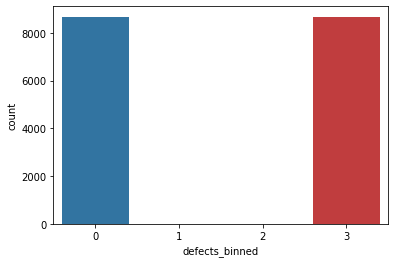

In [17]:
display(df_res['defects_binned'].value_counts())
sns.countplot(x = 'defects_binned', data = df_res)

## Salva os dados pré-processados

In [19]:
df.to_csv('../_pre/jm1_halstead_pre.csv', index = False)

> This is the end